## Exploring the Central Limit Theorem and the Weak Law of Large Numbers: An Analytical Journey through Time Series, Student-t Distribution, Skewness, and Kurtosis

#### Installing necessary libraries for the Coursework

In [42]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


#### Importing the necessary libraries for the Lab

In [47]:
import statsmodels.api as sm
import random
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

### Question 1:- Central Limit Theorem

**Student’s *t(k)* distribution is a well-known (it is implemented in scipy) but quite complicated family of probability distributions parametrized by a real number *k > 0*. There is no closed-form expression for the probability distribution *Pn = 1/n Σ_{i=1}^{n} P* when *P* is a Student distribution (unlike the case of the Normal distribution which you covered in the last lab). In this exercise, you will use the Central Limit Theorem (CLT) to approximate this distribution.
The CLT states that for sufficiently large values of *N*, the sample mean of *N* independent and identically distributed *t*-distributions *t(k)* (where *k* is a parameter of the distribution called degrees of freedom) is approximately given by a Normal Distribution with mean µ(t(k)) = 0 and variance Var(t(k)) = k / ((k-2)N).
Follow these steps:**



**a) Create a 2-by-3 array of subplots. Fix k = 3 and instantiate an array N = [5, 10, 30] and a variable size = 100, 000.**

**b) Using a for loop, for each value n in N sample a size × n array of samples from the distribution t(k)**

**c) Compute the sample average along each row (i.e. you should get size sample averages), and plot their histogram in a subplot.**

**d) Over the histogram (i.e. in the same subplot), plot the approximate density of the distribution of sample averages which is given by the CLT as described above.**

**e) In a separate subplot, display the QQ plot of the sample means versus their approximate distribution**

### Answer:-

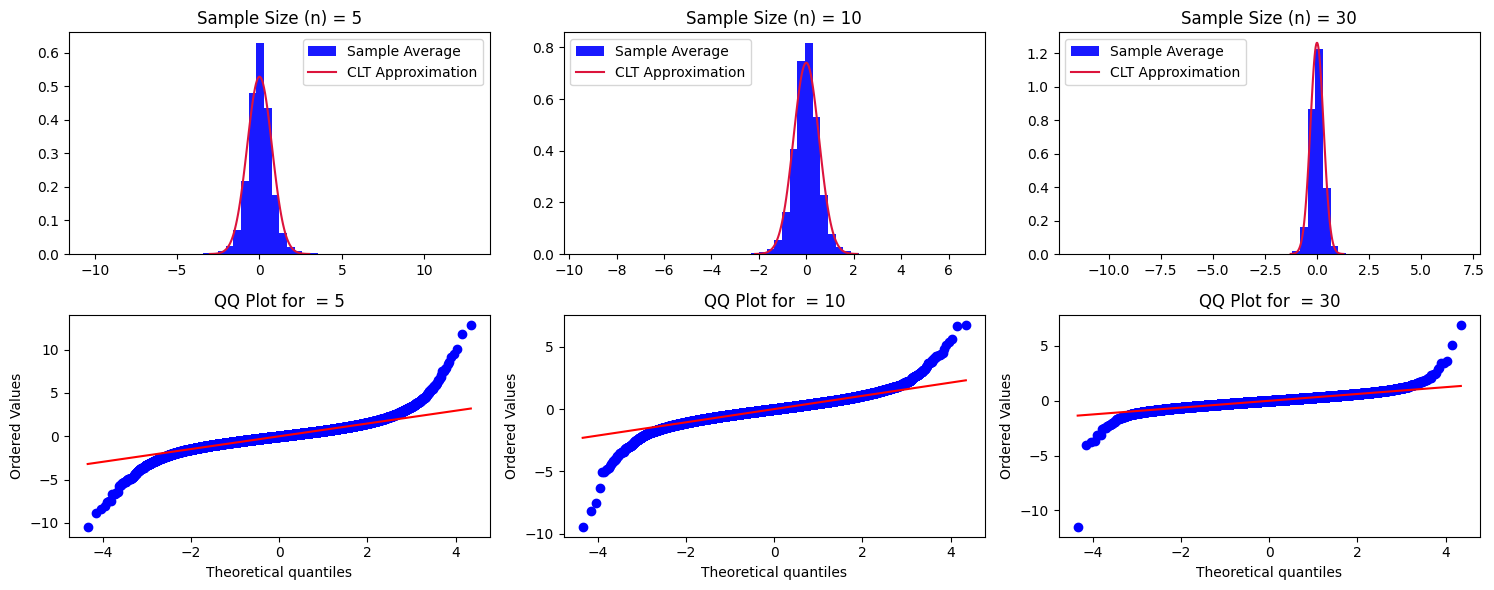

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Step a
k = 3 #Setting degrees of freedom as 3
N = [5, 10, 30]
size = 100000

#Step b-e
#Creating subplots(first row containting histograms with CLT approx and second row QQ plots)
fig, axes = plt.subplots(2, len(N), figsize=(15, 6))

for i, n in enumerate(N):
    #Step b
    samples = np.random.standard_t(df=k, size=(size, n)) #Creating samples with student t-distribution

    #Step c
    sample_average = np.mean(samples, axis=1)#Calculating average of samples
    #print(len(sample_average))

    #Step d
    axes[0, i].hist(sample_average, bins=50, density=True, alpha=0.9, color='blue', label='Sample Average')
    
    #Plotting the approximate density using CLT
    mu = np.mean(sample_average)
    sigma = np.std(sample_average)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    axes[0, i].plot(x, stats.norm.pdf(x, mu, sigma), color='crimson', label='CLT Approximation')#Comparing sample average with clt approx
    
    axes[0, i].legend()
    axes[0, i].set_title(f'Sample Size (n) = {n}')

    # Step e
    # QQ plot - sample average vs approx distribution(normal dist)
    stats.probplot(sample_average, dist='norm', plot=axes[1, i])
    axes[1, i].set_title(f'QQ Plot for  = {n}')

plt.tight_layout()
plt.show()


**For which value N is the approximate density of sample means given by the CLT a good approximation of the actual distribution from which you’ve drawn samples? Briefly justify your answer.**

#### Answer:-

**For N=30, the approximate density of sample means given by CLT is a good approximation of the actual distribution.**

The Central Limit Theorem states that for large sample sizes, the distribution of sample means from independent and identically distributed random variables approaches a normal distribution.

<br>**Histograms**<br>
- The histograms above illustrates the comparison of normal distribution with CLT distribution.
-  CLT theory is particularly evident in the histograms for N=30, where the shape of the distribution of sample means closely resembles the normal distribution.
- As sample size increases, we can observe from the histograms that the one which aligns well with the CLT approx is N = 30 and as N increases, there is a noticeable decrease in the variability of the sample means.

**QQ  Plots**
- We can observe that the points align with the diagonal line, especially in the central region. This indicates that the sample averages follow the expected normal distribution closely.
- The **heavier tails of the t-distribution** are mitigated by the larger sample size, this denotes the applicability of the Central Limit Theorem.
- A good approximation is the one where the points follow the line(normal distribution) indicating that the sample average is well approximated despite the heavy tails or a t-distribution. Therefore N=30.

_________________________________________________________________________________________________________________________________________________

### Question 2:- Download the Dow Jones Industrial Average from Stooq using the following code. Do NOT make any local copies of your data!

 <br>import pandas_datareader . data a s web<br>
 <br>data = web . DataReader ( ’^DJI ’ , ’ stooq’ , start=’ 1995−01−01 ’ , end=’2023−11−14 ’ )<br>
 <br>data = data . reset_index( )<br>
 <br>dates = data [ "Date" ]<br>
 <br>dow = data [ " Close " ] . to_numpy ( )<br>


### Answer:-

In [49]:
import pandas_datareader.data as web

data = web.DataReader ( '^DJI' , 'stooq' , start='1995-01-01' , end='2023-11-14' )
data = data. reset_index ( )
dates = data [ "Date" ]
dow = data [ "Close" ] . to_numpy ( )

In [50]:
print(data.tail())

           Date    Open    High     Low   Close      Volume
7264 1995-01-09  3867.4  3889.3  3834.4  3861.4  20812282.0
7265 1995-01-06  3850.9  3902.4  3823.7  3867.4  30237731.0
7266 1995-01-05  3857.7  3876.8  3825.4  3850.9  25819073.0
7267 1995-01-04  3838.5  3876.8  3815.3  3857.7  27227976.0
7268 1995-01-03  3834.4  3864.7  3805.5  3838.5  24439679.0


In [51]:
print(dates.tail(10))

7259   1995-01-16
7260   1995-01-13
7261   1995-01-12
7262   1995-01-11
7263   1995-01-10
7264   1995-01-09
7265   1995-01-06
7266   1995-01-05
7267   1995-01-04
7268   1995-01-03
Name: Date, dtype: datetime64[ns]


In [52]:
print(dow)

[34827.7  34337.87 34283.1  ...  3850.9   3857.7   3838.5 ]


**a) Plotting the time series**

#### Answer:-

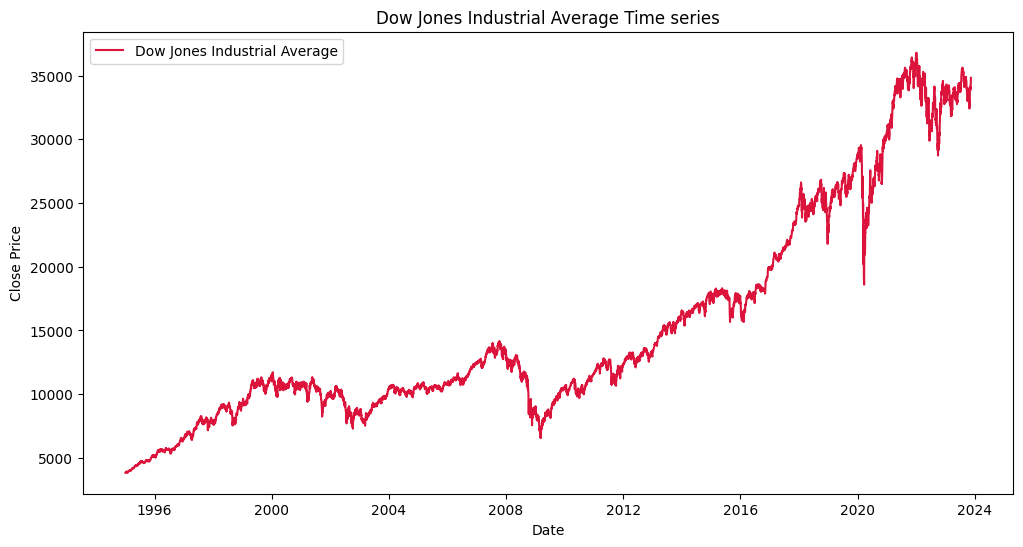

In [53]:
from matplotlib.dates import DateFormatter
plt.figure(figsize = (12,6))
plt.plot(dates, dow, label = 'Dow Jones Industrial Average', color = 'crimson')
plt.title('Dow Jones Industrial Average Time series')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Note: The above time series plot illustrates that the Closing price of the Daw Jones Industrial Average has been increasing over time.

**b) Compute the time series of (percentage) daily returns using the formula:**

\[ Return_t = 100 \times \left( \frac{Close_t}{Close_{t-1}} - 1 \right) \]

#### Answer:-

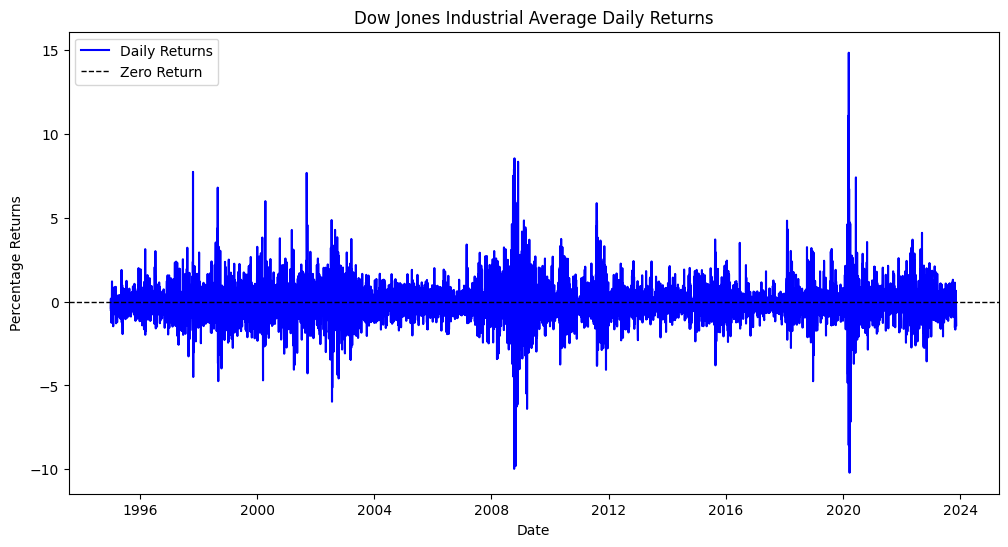

In [54]:
#Create an empty list to store the computed returns
returns = []

#Computing the returns for every date
for i in range(1, len(data)):
    close_today = data['Close'][i]
    close_yesterday = data['Close'][i - 1]
    daily_return = (close_today / close_yesterday - 1) * 100
    returns.append(daily_return)

#Add the returns to the DataFrame
data['Return'] = [None] + returns #Since we are calculating the close price from day 1, there is no previous day(close_yesterday is 0)

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Return'], label = 'Daily Returns', color = 'blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Return')#Line passing through 0 for better visualization
plt.title('Dow Jones Industrial Average Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Returns')
plt.legend()
plt.show()

**(c) Compute the length-n sample averages of daily returns, starting at the first datapoint, for every n ≥ 100. Thus the first datapoint in this time series will be the average of the first 100 daily returns, the second will be the average of the first 101 daily returns, etc., and the last will be the average of all daily returns. Plot this timeseries. Does it look like it obeys the weak Law of Large Numbers? If yes explain why, if not explain why this might be the case.**

#### Answer:-

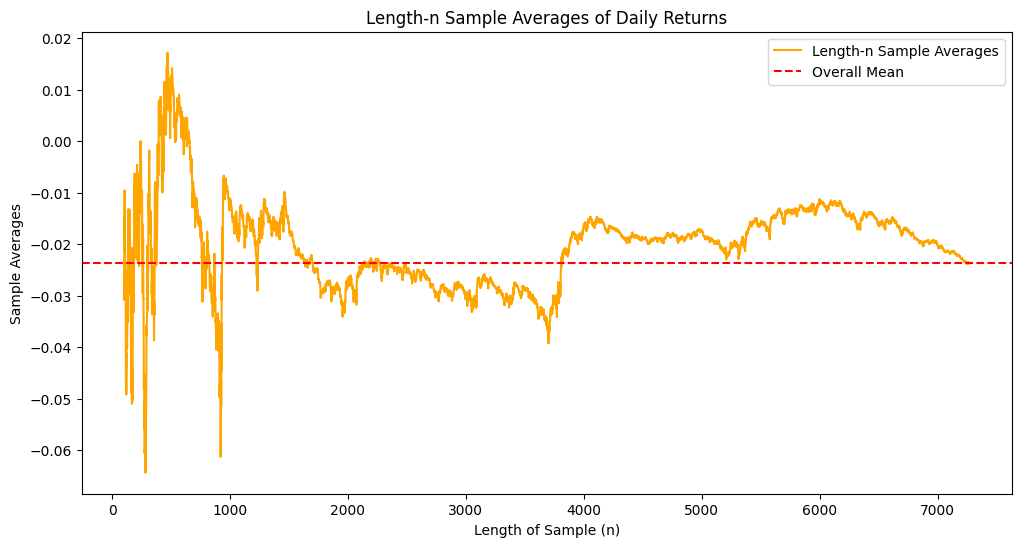

In [55]:
#Create an empty list to store the computed returns
returns = []

#Computing the returns for every date
for i in range(1, len(data)):
    close_today = data['Close'][i]
    close_yesterday = data['Close'][i - 1]
    daily_return = (close_today / close_yesterday - 1) * 100
    returns.append(daily_return)

#Add the returns to the DataFrame
data['Return'] = [None] + returns  # Since we are calculating the close price from day 1, there is no previous day (close_yesterday is 0)

#Compute length-n sample averages of daily returns
n_values = range(100, len(data['Return']) + 1)
sample_averages = [data['Return'][:n].mean() for n in n_values]

#Plot the length-n sample averages time series
plt.figure(figsize=(12, 6))
plt.plot(n_values, sample_averages, label='Length-n Sample Averages', color='orange')
plt.axhline(data['Return'].mean(), color='red', linestyle='--', label='Overall Mean')
plt.title('Length-n Sample Averages of Daily Returns')
plt.xlabel('Length of Sample (n)')
plt.ylabel('Sample Averages')
plt.legend()
plt.show()


**Does it look like it obeys the weak Law of Large Numbers? If yes explain why, if not explain why this might be the case.**

#### Answer:-

**Yes, it obeys the Weak Law of Large Numbers.**

**Observations:-**
+ The weak Law of Large Numbers states that as the sample size increases, the sample average converges in probability to the population mean. In simpler terms, as you take larger and larger samples from a population, the average of those samples should get closer to the true average of the entire population.
+ The plot shows convergence as n increases. This implies that the data follows the Weak Law of Large Numbers (WLLN), as the sample averages tend to approach the overall mean with larger sample sizes. 

**d) Compute the length-100 rolling averages of daily returns. Plot a histogram of these sample averages.
Repeat with length-400 rolling averages. Does it look like these obey the Central Limit Theorem? If
yes explain why, if not explain why this might be the case.**

#### Answer:-

Mean of Length-100 Rolling Averages: -0.024284644786792434
Standard Deviation of Length-100 Rolling Averages: 0.10105221425042278

Mean of Length-400 Rolling Averages: -0.022549205068329345
Standard Deviation of Length-400 Rolling Averages: 0.056687984242202526


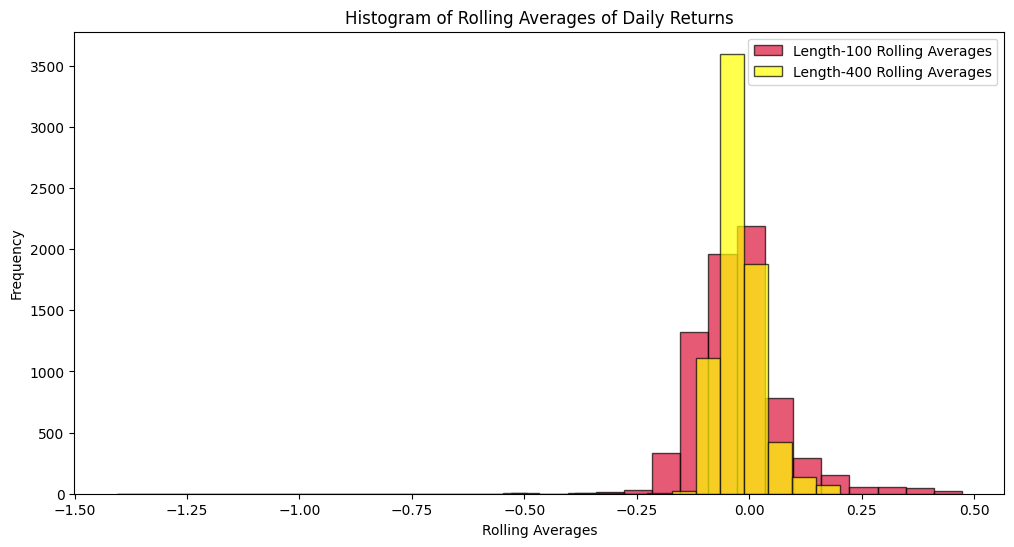

In [56]:
# Create a new column for daily returns
data['Daily_Return'] = data['Close'].pct_change() * 100

# Compute length-100 rolling averages of daily returns
rolling_avg_100 = data['Daily_Return'].rolling(window=100, min_periods=1).mean()

# Compute length-400 rolling averages of daily returns
rolling_avg_400 = data['Daily_Return'].rolling(window=400, min_periods=1).mean()
print(f'Mean of Length-100 Rolling Averages: {rolling_avg_100.mean()}')
print(f'Standard Deviation of Length-100 Rolling Averages: {rolling_avg_100.std()}')
print()
print(f'Mean of Length-400 Rolling Averages: {rolling_avg_400.mean()}')
print(f'Standard Deviation of Length-400 Rolling Averages: {rolling_avg_400.std()}')
plt.figure(figsize=(12, 6))

plt.hist(rolling_avg_100.dropna(), bins=30, color='crimson', edgecolor='black', alpha=0.7, label='Length-100 Rolling Averages')
plt.hist(rolling_avg_400.dropna(), bins=30, color='yellow', edgecolor='black', alpha=0.7, label='Length-400 Rolling Averages')

plt.title('Histogram of Rolling Averages of Daily Returns')
plt.xlabel('Rolling Averages')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Answer:-

<br>**Yes. It does obey Central Limit Theorem.**<br>
**Reasons:-**
- We can observe from the above plot, that the histogram of length 100 rolling averages and length 400 rolling averages look similar to a bell-shaped curve. This shape proves that there is some normality.
- The mean and standard deviation values for both length-100 and length-400 rolling averages are almost similar. This signifies consistency across different sample sizes is in line with the CLT, which predicts stability in these parameters as sample size increases.

**e) Compute the sample mean, variance, skewness and kurtosis of the daily returns. Based on this
information, suggest which family of distributions might model these daily returns. Briefly justify
your choice.**

#### Answer:-

In [57]:
from scipy.stats import skew, kurtosis
# Compute sample statistics
mean_return = np.mean(returns)
variance_return = np.var(returns, ddof=1)  # Use ddof=1 for sample variance
skewness_return = skew(returns)
kurtosis_return = kurtosis(returns)

# Display computed statistics
print(f'Sample Mean of Daily Returns: {mean_return}')
print(f'Sample Variance of Daily Returns: {variance_return}')
print(f'Skewness of Daily Returns: {skewness_return}')
print(f'Kurtosis of Daily Returns: {kurtosis_return}')

Sample Mean of Daily Returns: -0.023722955410124806
Sample Variance of Daily Returns: 1.3282496804110615
Skewness of Daily Returns: 0.6480631209171596
Kurtosis of Daily Returns: 12.97781454831144


**Briefly justify your choice.**

#### Answer:-

**Student's t-distribution might model these daily returns. The Student's t-distribution is used for handling heavier tails compared to the normal distribution. This is useful for financial returns that display fat tails.**

The distribution of daily returns deviates from a normal distribution and exhibits characteristics such as positive skewness and high kurtosis.

**Positive Skewness (0.6481)**- Indicates a right-skewed distribution, suggesting more extreme positive returns.

**High Kurtosis (12.9778)** - Indicates heavy tails and a peaked distribution, suggesting more extreme values and potential outliers.

**f) For this choice of family, you will now estimate the parameter(s) which best explain the data using the Maximum Likelihood Estimator approach. To achieve this:**
+ Implement the function which needs to be maximized (this was explained in the lectures). The parameter(s) which you are trying to estimate must of course be inputs to this function.
+ Using the minimize function from scipy.optimize, find the optimal parameters. (Hint: maximizing f(x) is the same thing as minimizing −f(x)). You can use any of the actual minimization methods, as long as it gives you a sensible answer.**
+ Once you have found the optimal parameters, plot the PDF of your optimal distribution against a histogram of the daily returns.

#### Answer:-

MLE Parameters (df, loc, scale): [ 2.85345635 -0.06272967  0.68880867]


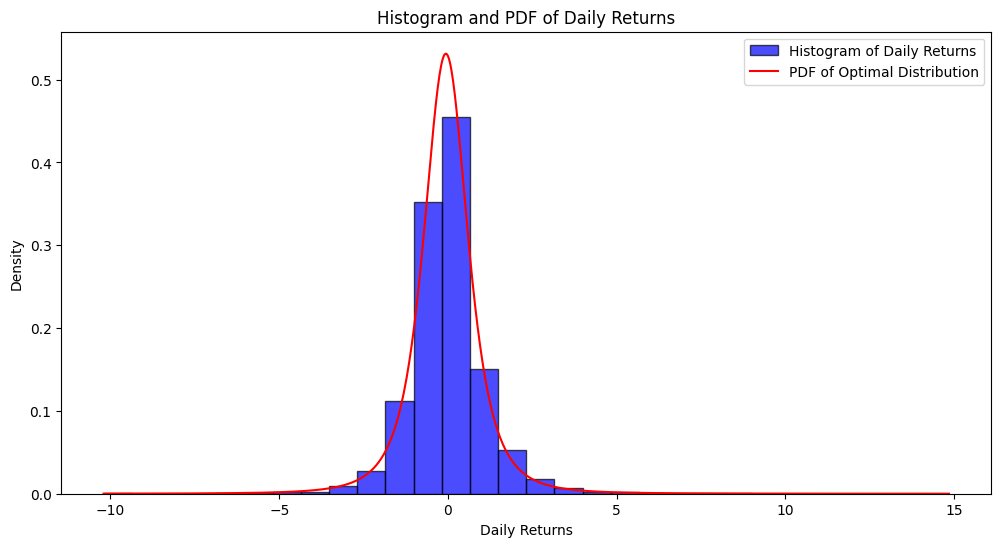

In [58]:
from scipy.stats import t
from scipy.optimize import minimize

# Define the negative log-likelihood function for the Student's t-distribution
def neg_log_likelihood(params, data):
    df, loc, scale = params
    log_likelihood = -np.sum(t.logpdf(data, df=df, loc=loc, scale=scale))
    return log_likelihood

#Initial arameters
initial_params = [3, np.mean(returns), np.std(returns)]#Degree of freedom, location, scale

#Minimize the negative log-likelihood to obtain MLE parameters
result = minimize(neg_log_likelihood, initial_params, args=(returns,), method='Nelder-Mead')

#Extract MLE parameters
mle_params = result.x

#Display MLE parameters
print(f'MLE Parameters (df, loc, scale): {mle_params}')

#Plot PDF of optimal distribution against histogram
plt.figure(figsize=(12, 6))

#Plot histogram
plt.hist(returns, bins = 30, density = True, alpha = 0.7, color = 'blue', edgecolor = 'black', label = 'Histogram of Daily Returns')

#Plot PDF of optimal distribution
x = np.linspace(np.min(returns), np.max(returns), 1000)
pdf_values = t.pdf(x, df = mle_params[0], loc = mle_params[1], scale = mle_params[2])
plt.plot(x, pdf_values, 'r-', label = 'PDF of Optimal Distribution')

plt.title('Histogram and PDF of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()

plt.show()

Note: The red line represents the probability density function (PDF) of the Student's t-distribution with parameters obtained from maximizing the negative log-likelihood function.
The blue bars represent a histogram of the daily returns data. Each bar represents a range of values, and the height of the bar indicates the frequency (density) of occurrences within that range.

**g)Check the results you obtained in the previous step by comparing it with the parameters you obtain from scipy’s fit function. Again, plot the PDF of the distribution with these parameters against a histogram of the daily returns.**

#### Answer:-

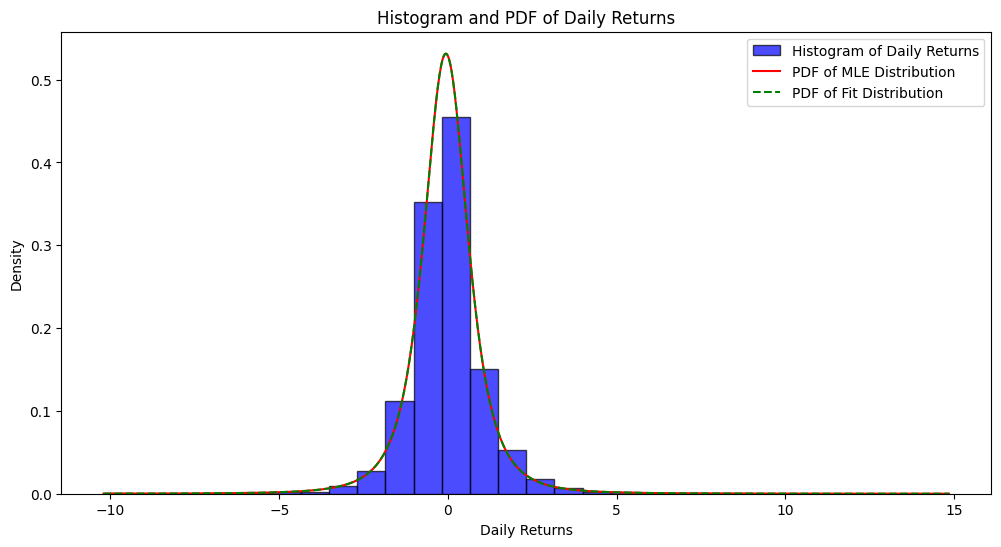

In [59]:
# Fit the data to a t-distribution using scipy.stats.fit
fit_params = t.fit(returns)

# MLE parameters (from previous step)
mle_params = result.x

# Plot PDF of both distributions against histogram
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(returns, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogram of Daily Returns')

# Plot PDF of MLE distribution
x = np.linspace(np.min(returns), np.max(returns), 1000)
pdf_mle = t.pdf(x, df=mle_params[0], loc=mle_params[1], scale=mle_params[2])
plt.plot(x, pdf_mle, 'r-', label='PDF of MLE Distribution')

# Plot PDF of distribution obtained from scipy.stats.fit
pdf_fit = t.pdf(x, df=fit_params[0], loc=fit_params[1], scale=fit_params[2])
plt.plot(x, pdf_fit, 'g--', label='PDF of Fit Distribution')

plt.title('Histogram and PDF of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()

plt.show()

The red and green lines closely matches the shape of the histogram. This signifies the robustness of MLE for parameter estimation.

**Histogram of Daily Returns (Blue Bars):**

Represents the empirical distribution of daily returns.

**PDF of MLE Distribution (Red Line):**
Represents the probability density function of the Student's t-distribution using the MLE parameters obtained from your initial approach.

**PDF of Fit Distribution (Green Dashed Line):**
Represents the probability density function of the Student's t-distribution using parameters obtained from scipy.stats.fit.